In [122]:
!aws s3 sync s3://deeseadata/style  base_style

download: s3://deeseadata/style/100152.jpg to base_style/100152.jpg                    
download: s3://deeseadata/style/100146.jpg to base_style/100146.jpg                    
download: s3://deeseadata/style/100378.jpg to base_style/100378.jpg                    
download: s3://deeseadata/style/10043.jpg to base_style/10043.jpg                       
download: s3://deeseadata/style/100185.jpg to base_style/100185.jpg                     
download: s3://deeseadata/style/100393.jpg to base_style/100393.jpg                     
download: s3://deeseadata/style/100218.jpg to base_style/100218.jpg                     
download: s3://deeseadata/style/100230.jpg to base_style/100230.jpg                     
download: s3://deeseadata/style/10057.jpg to base_style/10057.jpg                       
download: s3://deeseadata/style/100556.jpg to base_style/100556.jpg                     
download: s3://deeseadata/style/100608.jpg to base_style/100608.jpg                     
download: s3://deeseadat

In [ ]:
! conda install tensorflow-gpu

Solving environment: | 

In [ ]:
! conda install tensorflow-hub

In [1]:
!pip install tensorflow_hub

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
  Using cached https://files.pythonhosted.org/packages/fb/9d/d5772f94e31431cdb56a8bb2c34d8839bb7d7621f2a5959f4ef43207d7ac/tensorflow_hub-0.8.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/65/eb/1f97cb97bfc2390a276969c6fae16075da282f5058082d4cb10c6c5c1dba/six-1.14.0-py2.py3-none-any.whl
  Found existing installation: six 1.11.0
    Uninstalling six-1.11.0:
      Successfully uninstalled six-1.11.0
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image
import tensorflow_hub as hub
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
print("TF Version: ", tf.__version__)
print("TF-Hub version: ", hub.__version__)
print("Eager mode enabled: ", tf.executing_eagerly())
print("GPU available: ", tf.test.is_gpu_available())

TF Version:  2.1.0
TF-Hub version:  0.7.0
Eager mode enabled:  True
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU available:  True


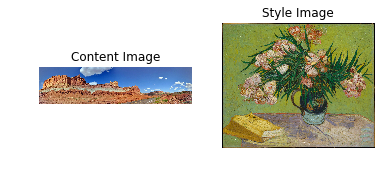

In [6]:
content_path = 'test_image.jpg'
style_path = 'oleanders-vincent-van-gogh.jpg'

content_image = plt.imread(content_path)
style_image = plt.imread(style_path)
plt.subplot(1, 2, 1)
plt.title('Content Image')
plt.axis('off')
imshow(content_image)
plt.subplot(1, 2, 2)
plt.title('Style Image')
plt.axis('off')
imshow(style_image)

In [16]:

def image_to_tensor(path_to_img, size=[256, 256], reshape=False):
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3, dtype=tf.float32)
    
    # Resize the image to specific dimensions
    if reshape: img = tf.image.resize(img, size)
    img = img[tf.newaxis, :]
    return img

In [21]:
t = image_to_tensor(style_path)

In [22]:
t

<tf.Tensor: shape=(1, 3130, 3811, 3), dtype=float32, numpy=
array([[[[0.01176471, 0.        , 0.        ],
         [0.00392157, 0.        , 0.        ],
         [0.00392157, 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.01176471, 0.        , 0.        ],
         [0.00392157, 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.00392157, 0.        , 0.        ],
         [0.00392157, 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.        , 0.        

In [15]:

def tensor_to_image(tensor):
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    tensor = tensor[0]
    plt.figure(figsize=(20,10))
    plt.axis('off')
    return plt.imshow(tensor)

In [3]:
from PIL import Image

def create_content_batch_tf(path, batch_size = 1):
    img = Image.open(path)
    img_array = np.asarray(img)/255.
    img_array = np.expand_dims(img_array, axis=0)
    img_batch = np.repeat(img_array, batch_size, axis=0)
    return tf.convert_to_tensor(img_batch, dtype=float32)


def create_style_batch_tf(paths, batch_size):
    assert len(paths) == batch_size, "Batch size needs to be the same as size of paths"
    img_batch = np.zeros([batch_size, 256, 256, 3])
    for i, path in enumerate(paths):
        img = Image.open(path).resize((256, 256))
        img_array = np.asarray(img)/255.
        img_batch[i] = img_array
    return tf.convert_to_tensor(img_batch, dtype=float32)

In [7]:
batch_size = 1
content_image_tensor = create_content_batch_tf(content_path, batch_size)
style_image_tensor = create_style_batch_tf([style_path]*batch_size, batch_size)

In [8]:
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
combined_result = hub_module(tf.constant(content_image_tensor), tf.constant(style_image_tensor))

In [11]:
from PIL import Image

def generate_image(content_path, style_path):
    content_image_tensor = image_to_tensor(content_path)
    style_image_tensor = image_to_tensor(style_path, reshape=True)
    hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
    combined_result = hub_module(tf.constant(content_image_tensor), tf.constant(style_image_tensor))[0]
    return combined_result[0].numpy()

def save_image(image, filename):
    im = Image.fromarray((image * 255).astype(np.uint8))
    im.save(f"{filename}")
    
    
    

In [17]:
import os
import glob
input_dir = "base_style"
output_prefix = "output"
output_dir = os.path.join(input_dir, output_prefix)
files = [f for f in glob.glob( input_dir + "/11*.jpg", recursive=False)]

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

content_path = 'test_image.jpg'
for style_path in files:
    print(style_path)
    im = generate_image(content_path, style_path)
    save_image(im, os.path.join(output_dir, style_path[11:]))
    


base_style/11598.jpg


UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node InceptionV3/Conv2d_1a_3x3/Conv2D (defined at /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tensorflow_hub/module_v2.py:102) ]] [Op:__inference_pruned_15157]

Function call stack:
pruned


In [167]:
!aws s3 cp base_style/output/*  s3://deeseadata/output


Unknown options: base_style/output/11229.jpg,base_style/output/11349.jpg,base_style/output/11361.jpg,base_style/output/11375.jpg,base_style/output/11407.jpg,base_style/output/11413.jpg,base_style/output/1145.jpg,base_style/output/1151.jpg,base_style/output/11567.jpg,base_style/output/11573.jpg,base_style/output/11598.jpg,base_style/output/11639.jpg,base_style/output/11759.jpg,base_style/output/11765.jpg,base_style/output/11771.jpg,base_style/output/1179.jpg,base_style/output/1186.jpg,base_style/output/1192.jpg,base_style/output/11956.jpg,base_style/output/11981.jpg,s3://deeseadata/output
